In [96]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout,Activation
from keras import optimizers
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [97]:
sand = 'https://raw.githubusercontent.com/loguansiang/fyp/main/SAND%20fyp.csv'
# slp= 'https://raw.githubusercontent.com/loguansiang/fyp/main/SLP%20fyp.csv'
# mana = 'https://raw.githubusercontent.com/loguansiang/fyp/main/MANA%20fyp.csv'

df = pd.read_csv(sand)

In [98]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [99]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-14,0.086577,0.086577,0.059597,0.065645,0.065645,118988161
2020-08-15,0.066077,0.069509,0.048985,0.050964,0.050964,36213441
2020-08-16,0.051438,0.069508,0.048064,0.060847,0.060847,33023213
2020-08-17,0.060847,0.065073,0.052525,0.053999,0.053999,11686493
2020-08-18,0.053784,0.060990,0.050675,0.051700,0.051700,7401293
...,...,...,...,...,...,...
2022-04-13,2.781983,2.886945,2.751847,2.869923,2.869923,321784424
2022-04-14,2.869366,2.916186,2.714203,2.780882,2.780882,349909147
2022-04-15,2.781060,2.820187,2.755915,2.803639,2.803639,189256519


In [100]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [101]:
import pandas as pd
import ta
from ta import add_all_ta_features
from ta.utils import dropna

In [102]:
df['Pre_Close'] = df['Close'].shift(+1)
df[('H-L')] = df['High'] - df['Low']
df[('0-C')]= df['Open'] - df['Close']
df['SMA_7'] = df.Close.rolling(7, min_periods=1).mean()
df['rsi_7']=ta.momentum.rsi(df.Close,window=7)
#df['MACD'] = ta.trend.macd_diff(df.Close)
df['EMA_7']= df['Close'].ewm(span=7).mean()
df = df.drop(columns=['Adj Close'])
df.dropna(inplace= True)
df

,Open,High,Low,Close,Volume,Pre_Close,H-L,0-C,SMA_7,rsi_7,EMA_7
Date,,,,,,,,,,,
2020-08-20,0.052095,0.057325,0.050800,0.053648,7332475,0.052095,0.006525,-0.001553,0.055557,36.094661,0.054128
2020-08-21,0.053644,0.053738,0.044235,0.044235,5121097,0.053648,0.009503,0.009409,0.052498,23.308807,0.051380
2020-08-22,0.044395,0.049011,0.040692,0.046011,4347394,0.044235,0.008319,-0.001616,0.051791,28.856159,0.049928
2020-08-23,0.045990,0.048237,0.041965,0.044007,3114426,0.046011,0.006272,0.001983,0.049385,26.347291,0.048360
2020-08-24,0.043902,0.053543,0.042178,0.051299,7868186,0.044007,0.011365,-0.007397,0.048999,46.203257,0.049127
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13,2.781983,2.886945,2.751847,2.869923,321784424,2.782421,0.135098,-0.087940,2.886363,40.236566,2.909637
2022-04-14,2.869366,2.916186,2.714203,2.780882,349909147,2.869923,0.201983,0.088484,2.843185,36.188051,2.877448
2022-04-15,2.781060,2.820187,2.755915,2.803639,189256519,2.780882,0.064272,-0.022579,2.829312,38.046757,2.858996


In [103]:
def data_prep(dataset, target, data_start, data_end, look_back, horizon):
    dataX,dataY = [],[]
    data_start = data_start + look_back
    if data_end is None:
        data_end = len(dataset) - horizon

    for i in range(data_start, data_end):
        a = range(i-look_back, i)
        dataX.append(dataset[a])

        b = range(i+1, i+1+horizon)
        dataY.append(target[b])
    return np.array(dataX), np.array(dataY)

In [104]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
# X_data = X_scaler.fit_transform(df[['Open', 'High', 'Low','Volume','H-L',	'0-C','SMA_7','rsi_7','EMA_7']])//experiment4
X_data = X_scaler.fit_transform(df[['Pre_Close']])
Y_data = Y_scaler.fit_transform(df[['Close']])

##['Open', 'High', 'Low','Volume']
##['H-L',	'0-C','SMA_7','rsi_7','EMA_7']

In [105]:
##TRAIN_SPLIT = int(len(df) * 0.8)
look_back = 10
horizon = 10
train_split = int(len(df) * 0.8)
x_train, y_train = data_prep(X_data, Y_data, 0, train_split, look_back, horizon)
x_vali, y_vali = data_prep(X_data, Y_data, train_split, None, look_back, horizon)

In [106]:
# x_train

In [107]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0])

Multiple window of past history

[[0.00254128]
 [0.00272679]
 [0.00160237]
 [0.00181452]
 [0.00157513]
 [0.00244619]
 [0.00206167]
 [0.00325873]
 [0.00512306]
 [0.00463735]]

 Target horizon

[[0.0047021 ]
 [0.00347374]
 [0.00337472]
 [0.00161431]
 [0.00174523]
 [0.00080584]
 [0.00120685]
 [0.00084849]
 [0.0022731 ]
 [0.00209141]]


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evalution
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import tensorflow as tf

In [109]:
batch_size = 16

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.batch(batch_size).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [110]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# from keras.layers.merge import concatenate
import tensorflow as tf

In [111]:
x_train.shape[-2:]

(10, 1)

In [112]:
#define model
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import regularizers

# Set the learning rate
#0.0001,0.001,0.01,0.1,1
learning_rate = 0.00001

# Create the optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)
l1_rate=regularizers.l1(0.005)
l2_rate=regularizers.l2(0.01)

# Set random seed for as reproducible results as possible
tf.random.set_seed(7)
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(x_train.shape[-2:]),activity_regularizer= l1_rate,kernel_regularizer= l2_rate))
cnn_model.add(Conv1D(filters=64, kernel_size=1,activity_regularizer= l1_rate,kernel_regularizer= l2_rate))
cnn_model.add(MaxPooling1D(pool_size=(1)))
cnn_model.add(Conv1D(filters=128, kernel_size=1,activity_regularizer= l1_rate,kernel_regularizer= l2_rate))
cnn_model.add(Flatten())
cnn_model.add(Dense(256,activity_regularizer= l1_rate,kernel_regularizer= l2_rate))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(10,activity_regularizer= l1_rate))
# Compile the model with the optimizer
cnn_model.compile(optimizer=optimizer, loss='mse')
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 10, 32)            64        
                                                                 
 conv1d_10 (Conv1D)          (None, 10, 64)            2112      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 10, 64)           0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 10, 128)           8320      
                                                                 
 flatten_3 (Flatten)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               327936    
                                                      

In [113]:

import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
# tf.random.set_seed(7)

# lstm_model = Sequential()
# lstm_model.add(LSTM(100,return_sequences=True,input_shape=(x_train.shape[-2:])))
# lstm_model.add(Dense(20,activation='linear'))
# lstm_model.add(LSTM(50))
# lstm_model.add(Dropout(0.2))
# lstm_model.add(Dense(units=horizon,activation='linear'))
# lstm_model.compile(loss='mean_squared_error', optimizer='adam')
# lstm_model.summary()


In [114]:
#model_path = 'CNN_Multivariate.h5'
#early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
#checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
#callbacks=[early_stopings,checkpoint]

In [115]:
history = cnn_model.fit(train_data,epochs=50,steps_per_epoch=100,batch_size=16,validation_data=val_data,validation_steps=50,verbose=1)
# history = lstm_model.fit(train_data,epochs=50,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1)#callback
##history = cnn_model.fit(train_data,epochs=50,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1)

Epoch 1/50
100/100 [==============================] - 2s 10ms/step - loss: 5.6072 - val_loss: 6.2087
Epoch 2/50
100/100 [==============================] - 1s 7ms/step - loss: 5.4148 - val_loss: 5.9668
Epoch 3/50
100/100 [==============================] - 1s 5ms/step - loss: 5.2549 - val_loss: 5.7461
Epoch 4/50
100/100 [==============================] - 1s 5ms/step - loss: 5.0421 - val_loss: 5.5369
Epoch 5/50
100/100 [==============================] - 1s 6ms/step - loss: 4.8692 - val_loss: 5.3424
Epoch 6/50
100/100 [==============================] - 1s 5ms/step - loss: 4.7242 - val_loss: 5.1558
Epoch 7/50
100/100 [==============================] - 1s 5ms/step - loss: 4.5332 - val_loss: 4.9757
Epoch 8/50
100/100 [==============================] - 1s 5ms/step - loss: 4.3750 - val_loss: 4.8054
Epoch 9/50
100/100 [==============================] - 1s 5ms/step - loss: 4.2430 - val_loss: 4.6405
Epoch 10/50
100/100 [==============================] - 0s 5ms/step - loss: 4.0699 - val_loss: 4.480

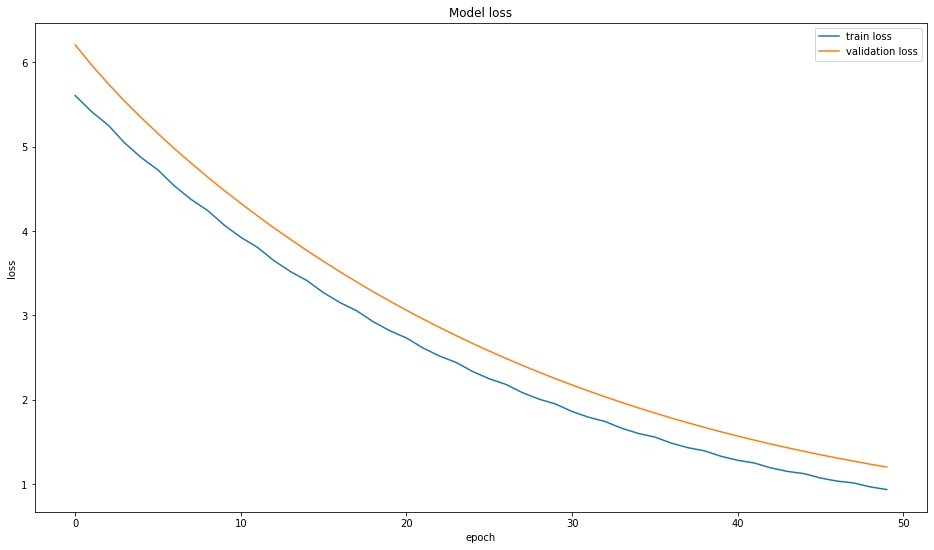

In [116]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [117]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Pre_Close', 'H-L', '0-C',
       'SMA_7', 'rsi_7', 'EMA_7'],
      dtype='object')

In [118]:

##['open']


data_val = X_scaler.fit_transform(df[['Pre_Close']].tail(10))
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])
pred=cnn_model.predict(val_rescaled)
pred_Inverse = Y_scaler.inverse_transform(pred)
pred_Inverse

1/1 [==============================] - 0s 89ms/step


array([[1.9668181, 1.8290347, 2.065744 , 2.0014582, 2.1039445, 2.1182692,
        1.9191262, 2.1051517, 1.9141603, 2.1486444]], dtype=float32)

In [119]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')


In [120]:
validate = (df[['Close']].tail(10))
timeseries_evaluation_metrics_func(validate['Close'],pred_Inverse[0])

Evaluation metric results:-
MSE is : 0.6880491665988722
MAE is : 0.8146538878097533
RMSE is : 0.8294872914028715
MAPE is : 28.66265513130829


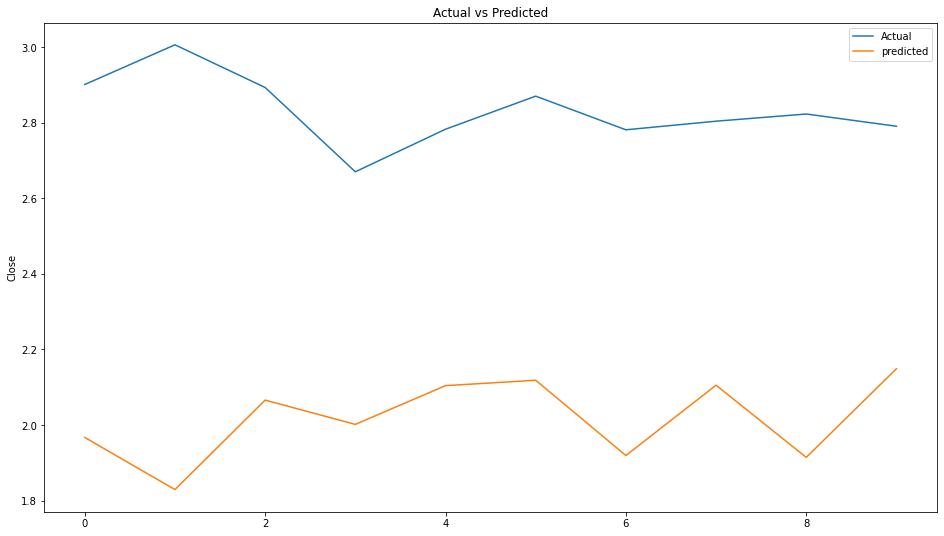

In [121]:
plt.figure(figsize=(16,9))
plt.plot( list(validate['Close']))
plt.plot( list(pred_Inverse[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Close")
plt.legend(('Actual','predicted'))
plt.show()